In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pd.set_option('display.max_columns', 100)
# import data set
df = pd.read_csv('hour.csv')

The object of the exploratory analysis is to get a good outline of the dataset and to discover first relations between the variables. The target of our analysis is the column 'cnt' and we want to discover what variables are best for predicting future bike rental numbers.

In [30]:
print('Dataframe shape: {}\n'.format(df.shape))
print(df.dtypes)
print('\nDescription columns:\n')
print(df[['casual', 'registered', 'cnt']].describe())

Dataframe shape: (17379, 17)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Description columns:

             casual    registered           cnt
count  17379.000000  17379.000000  17379.000000
mean      35.676218    153.786869    189.463088
std       49.305030    151.357286    181.387599
min        0.000000      0.000000      1.000000
25%        4.000000     34.000000     40.000000
50%       17.000000    115.000000    142.000000
75%       48.000000    220.000000    281.000000
max      367.000000    886.000000    977.000000


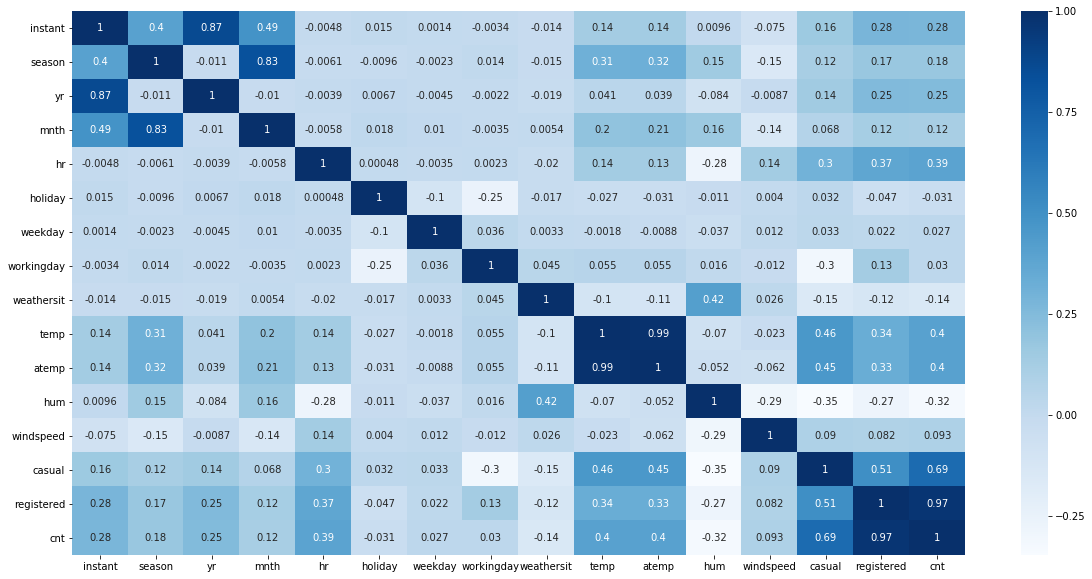

In [22]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

The biggest correlation from 'cnt' is to 'temp', 'atemp' and 'hour'. In the following the hour of day and temperature will be further investigated. This is shown in two graphs.

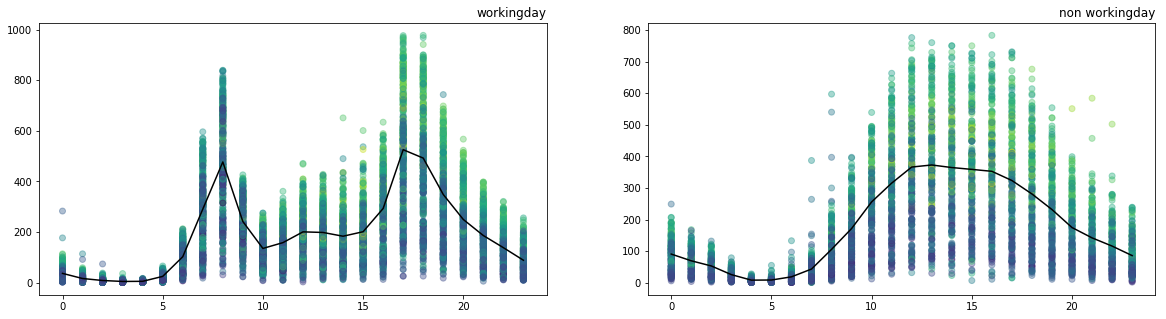

In [11]:
# plot bike rental numbers over the course of one day
train_workingday = df[df['workingday'] == 1]
train_workingday_hr = train_workingday.groupby(['hr']).mean()
plt.subplot(1, 2, 1)
plt.scatter(train_workingday['hr'], train_workingday['cnt'], c=train_workingday['temp'], alpha=0.4)
plt.plot(train_workingday_hr['cnt'], color='0')
plt.title('workingday', loc='right')

train_non_workingday = df[df['workingday'] == 0]
train_non_workingday_hr = train_non_workingday.groupby(['hr']).mean()
plt.subplot(1, 2, 2)
plt.scatter(train_non_workingday['hr'], train_non_workingday['cnt'], c=train_non_workingday['temp'], alpha=0.4)
plt.plot(train_non_workingday_hr['cnt'], color='0')
plt.title('non workingday', loc='right')

plt.rcParams["figure.figsize"] = (20,5)
plt.show()

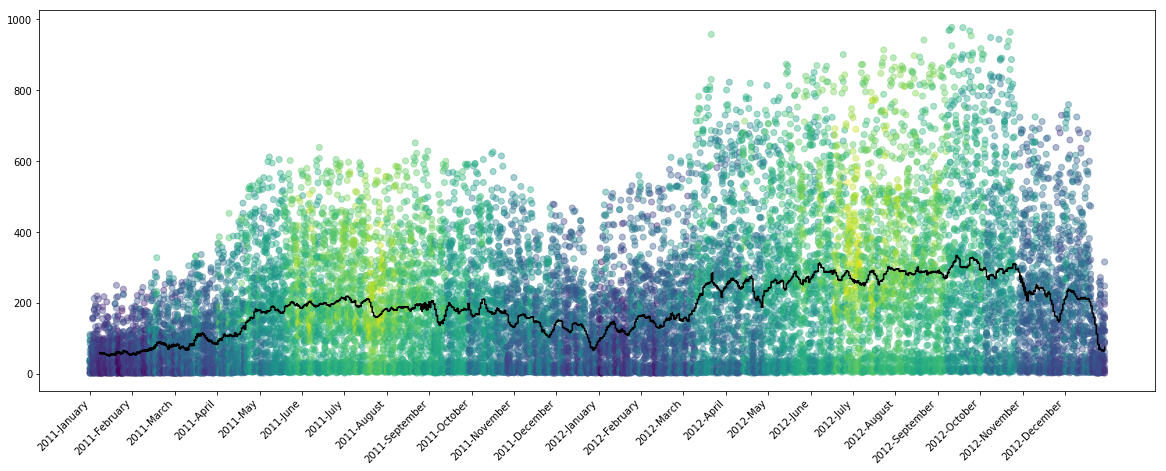

In [15]:
# plot usage over entire time span
months_xticks = []
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
            'November', 'December']
for i in ['2011', '2012']:
    for j in range(12):
        months_xticks.append(i + '-' + months[j])
locs = [i * 30.5 for i in range(24)]
plt.xticks(locs, months_xticks, rotation=45, horizontalalignment='right')
plt.scatter(df['dteday'], df['cnt'], c=df['temp'], alpha=0.4)
plt.plot(df['dteday'], df['cnt'].rolling(24*7, win_type='boxcar').mean(), color='0')
plt.rcParams["figure.figsize"] = (20,7)
plt.show()